To run a DFT computation we just need to specify the functional to use and the basis set.

The following input runs a computation on H$_2$ using the B3LYP functional and the def2-SVP basis set

In [3]:
mol = psi4.geometry("""
H
H 1 0.75
""")

psi4.set_options({'BASIS' : 'def2-SVP'})
psi4.energy('B3LYP')

-1.1737517015176304

The input below **is equivalent**

In [4]:
mol = psi4.geometry("""
H
H 1 0.75
""")

psi4.energy('scf/def2-SVP',dft_functional='b3lyp')

-1.17375170151763

Psi4 can run DFT computations in two ways:

1. **Restricted Kohn–Sham** (RKS). This is the default assumed by psi4. **RKS only works for closed-shell singlet molecules** but it is the most efficient implementation.
In RKS the density of alpha and beta electrons are the same
$$
\rho_\alpha = \rho_\beta
$$

2. **Unrestricted Kohn–Sham** (UKS). UKS can be used for open-shell molecules (e.g. with an odd number of electrons). In UKS the density of alpha and beta electrons are different
$$
\rho_\alpha \neq \rho_\beta
$$
To run an unrestricted Kohn–Sham computation add the option
```python
psi4.set_options({'REFERENCE' : 'UKS'})
```

The following runs a DFT computation on H$_2^+$:

In [7]:
mol = psi4.geometry("""
1 2
H
H 1 0.75
""")

psi4.set_options({'REFERENCE' : 'UKS'})
psi4.energy('B3LYP/def2-SVP')

-0.5694795786346649

---

## Exploring DFT functionals

For a list of DFT functional supported by psi4 check [this page](
https://psicode.org/psi4manual/master/dft_byfunctional.html).

In [8]:
functionals = ['B1LYP', 'B1PW91', 'B1WC', 'B2GPPLYP', 'B2GPPLYP-NL',
               'B2PLYP', 'B2PLYP-NL', 'B3LYP', 'B3LYP-NL', 'B3LYP5',
               'B3LYPS', 'B3P86', 'B3PW91', 'B3PW91-NL', 'B5050LYP',
               'B86B95', 'B86BPBE', 'B88B95', 'B97-0', 'B97-1',
               'B97-1P', 'B97-2', 'B97-3', 'B97-GGA1', 'B97-K',
               'B97M-V', 'BB1K', 'BHANDH', 'BHANDHLYP', 'BLYP',
               'BLYP-NL', 'BMK', 'BOP', 'BP86', 'BP86-NL',
               'CAM-B3LYP', 'CAP0', 'DSD-BLYP', 'DSD-BLYP-NL',
               'DSD-PBEB95', 'DSD-PBEB95-NL', 'DSD-PBEP86',
               'DSD-PBEP86-NL', 'DSD-PBEPBE', 'DSD-PBEPBE-NL',
               'EDF1', 'EDF2', 'FT97', 'GAM', 'HCTH120', 'HCTH147',
               'HCTH407', 'HCTH407P', 'HCTH93', 'HCTHP14', 'HCTHP76', 'HF']

We can now use a loop to run all of these computations for us

In [9]:
# psi4.set_options({'SCF_TYPE' : 'PK'})
psi4.set_options({'REFERENCE' : 'UKS'})

data = {}
for f in functionals:
    print(f)
    mol = psi4.geometry("0 2\nH")
    e = psi4.energy(f'{f}/cc-pVDZ')
    data[f] = e    

B1LYP
B1PW91
B1WC
B2GPPLYP
B2GPPLYP-NL
B2PLYP
B2PLYP-NL
B3LYP
B3LYP-NL
B3LYP5
B3LYPS
B3P86
B3PW91
B3PW91-NL
B5050LYP
B86B95
B86BPBE
B88B95
B97-0
B97-1
B97-1P
B97-2
B97-3
B97-GGA1
B97-K
B97M-V
BB1K
BHANDH
BHANDHLYP
BLYP
BLYP-NL
BMK
BOP
BP86
BP86-NL
CAM-B3LYP
CAP0
DSD-BLYP
DSD-BLYP-NL
DSD-PBEB95
DSD-PBEB95-NL
DSD-PBEP86
DSD-PBEP86-NL
DSD-PBEPBE
DSD-PBEPBE-NL
EDF1
EDF2
FT97
GAM
HCTH120
HCTH147
HCTH407
HCTH407P
HCTH93
HCTHP14
HCTHP76
HF


Let's make the histrogram of the energy

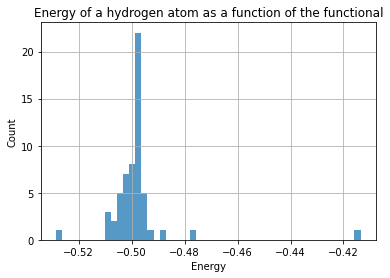

In [11]:
import matplotlib.pyplot as plt

x = list(data.values())
# the histogram of the data
n, bins, patches = plt.hist(x,50,alpha=0.75)


plt.xlabel('Energy')
plt.ylabel('Count')
plt.title('Energy of a hydrogen atom as a function of the functional')
plt.grid(True)
plt.show()

## Dispersion corrections

In [ ]:
def make_geom(r):
    mol = psi4.geometry(f"""
      0 1
      He
      He 1 {r:f}
    """)
    return mol

mol = make_geom(2.0)
e = psi4.energy('b3lyp/def2-SVP')
e_disp = psi4.energy('b3lyp-d/def2-SVP')

print(e - e_disp)

Long-range corrected density functionals

In [ ]:
mol = psi4.geometry("""
  0 3
  C
  H 1 R
  H 1 R 2 A

  R = 1.075
  A = 133.93
""")

psi4.set_options({'REFERENCE' : 'UKS'})
psi4.energy('wb97x/def2-SVP')

## Grids
Integration grids are necessary to compute some the integrals needed to do DFT computations.
Psi4 uses concentric spherical grids that are centered on atoms.
The DFT grid is specified by two variables:
1. the number of points on a sphere (spherical grids, specified by the variable `DFT_SPHERICAL_POINTS`). Psi4 uses Lebedev grids, which have a well defined set of points (for example, 110,194,302,434,590,770,...). **The default value in psi4 is 302**.
1. the number of spheres repeated around the atom (radial grid). Radial grids range typically between 50-100. **The default value in psi4 is 75**.

The default setting used in psi4 correspond to the following setting
```python
psi4.set_options({'SCF_TYPE' : 'DF', 'DFT_SPHERICAL_POINTS' : 304, 'DFT_RADIAL_POINTS' : 75})
```

In all your computations use the following xyz coordinates for the 1,3-butadiene molecule and the def2-TZVP basis set
```python
C       -0.8344243369      0.8501484612     -0.7253718221                 
C       -1.8774957513      0.0301597364     -0.5654824991                 
C       -1.8797343449     -1.4051448234     -0.7394257063                 
C       -0.8080513392     -2.2027090383     -0.8001525085                 
H       -0.9290336893     -3.2764719955     -0.9066107864                 
H        0.2069245251     -1.8262312041     -0.7355227035                 
H       -2.8679640693     -1.8614071150     -0.7851285981                 
H       -0.9495605292      1.9192966084     -0.5741034160                 
H        0.1532292846      0.4959820053     -0.9995642823                 
H       -2.8402242246      0.4619062756     -0.2938989549
```

- Report the time it takes to compute the energy of 1,3-butadiene using the PK, DIRECT, and DF algorithms **using the default grid settings**. To get the time it takes to execute a jupyter command you can use the jupyter magic command %time in this way
```python
%time e = psi4.energy('B3LYP/def2-TZVP')
```
this command prints the following text
```
CPU times: user 1min 3s, sys: 8.58 s, total: 1min 12s
Wall time: 1min 11s
```
**Take the 'Wall time' as the measure of the total time**. Since each time you run a job the time will be different, **run three computations of each type reporting the shortest and longest time**.
For each algorithm report the energy. How much different is the energy computed with DF from the PK and DIRECT energy (in kcal/mol)?
Put your results in the following table

| ALGORITHM | Minimum time (in seconds) | Maximum time (in seconds) | Error (in kcal/mol, wrt to PK) |
|-----------|---------------------------|---------------------------|--------------------------------|
| PK        |                           |                           |                                |
| DIRECT    |                           |                           |                                |
| DF        |                           |                           |                                |

- Report the time it takes to compute the energy of 1,3-butadiene **using the DF algorithm** and the grid settings reported in the table below. Fill in the table with your results (run only one job for each setting instead of three). Report the total energy and the energy error with respect to the computation done with the largest grid


| DFT_SPHERICAL_POINTS | DFT_RADIAL_POINTS | Time (in seconds) | Energy (in Eh) | Error (in kcal/mol, wrt to best) |
|----------------------|-------------------|-------------------|----------------|----------------------------------|
| 110                  | 25                |                   |                |                                  |
| 194                  | 50                |                   |                |                                  |
| 302                  | 75                |                   |                |                                  |
| 590                  | 100               |                   |                |                                  |
| 770                  | 150               |                   |                |                                  |

- Although it is tempting to cut the grid in size there are potential artifacts that can arise with small grids. What grid size is necessary to achieve energies that differ by less than 10$^{-6}$ E$_h$ from the largest grid?